What's your bird

Extract the zip of Caltech-UCSD Birds 200 data 

In [0]:

from pathlib import Path
import urllib.request
import tarfile

urlPath = 'http://www.vision.caltech.edu/visipedia-data/CUB-200/images.tgz'

url = urlPath
local_tgz_path = Path("./birdsData.tar.gz")
print("Downloading from %s..." % (url,))
urllib.request.urlretrieve(url, local_tgz_path)



(PosixPath('birdsData.tar.gz'), <http.client.HTTPMessage at 0x7f6bb6b3dfd0>)

Extract the tar and set path to current directory

In [0]:
print("Opening using tarfile from %s..." % (local_tgz_path,))
tarred_file = tarfile.open(local_tgz_path)
tarred_file.extractall(path="/content")
tarred_file.close()
print("Completed")

Opening using tarfile from birdsData.tar.gz...
Completed


In [0]:
path = Path("/content")

Copy all the images to a newly created "train" folder

In [0]:
!mkdir train
!cp -r ./images/* ./train

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size*.

In [0]:
bs = 32

# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

Load the data using data block api and set the pattern of labels from the file names as below


In [0]:
patt=r"\.((?:.*))\/"

In [0]:
data = (ImageList.from_folder(path) #Where to find the data? -> in path and its subfolders
        .split_by_rand_pct()   
        .label_from_re(pat = patt, full_path=False)                  #How to split in train/valid? -> use the folders
        .transform(get_transforms(do_flip=False), size=64)        #Data augmentation? -> use tfms with a size of 64
        .databunch()) 

In [0]:
data

ImageDataBunch;

Train: LabelList (9653 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
American_Crow/American_Crow_0011_2470003522,American_Crow/American_Crow_0002_165448164,American_Crow/American_Crow_0008_2150236048,American_Crow/American_Crow_0004_2989461804,American_Crow/American_Crow_0007_2358962421
Path: /content;

Valid: LabelList (1953 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Pine_Grosbeak/Pine_Grosbeak_0008_2207763864,Yellow_throated_Vireo/Yellow_throated_Vireo_0028_2495485933,Black_footed_Albatross/Black_footed_Albatross_0016_2756723036,American_Three_toed_Woodpecker/American_Three_toed_Woodpecker_0027_2614499559,Rufous_Hummingbird/Rufous_Hummingbird_0007_2444717300
Path: /content;

Test: None

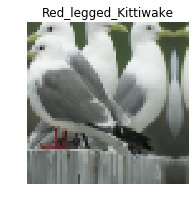

In [0]:
data.show_batch(1, figsize=(3,3), hide_axis=True)

In [0]:
print(data.classes)
len(data.classes),data.c

['001.Black_footed_Albatross', '002.Laysan_Albatross', '003.Sooty_Albatross', '004.Groove_billed_Ani', '005.Crested_Auklet', '006.Least_Auklet', '007.Parakeet_Auklet', '008.Rhinoceros_Auklet', '009.Brewer_Blackbird', '010.Red_winged_Blackbird', '011.Rusty_Blackbird', '012.Yellow_headed_Blackbird', '013.Bobolink', '014.Indigo_Bunting', '015.Lazuli_Bunting', '016.Painted_Bunting', '017.Cardinal', '018.Spotted_Catbird', '019.Gray_Catbird', '020.Yellow_breasted_Chat', '021.Eastern_Towhee', '022.Chuck_will_Widow', '023.Brandt_Cormorant', '024.Red_faced_Cormorant', '025.Pelagic_Cormorant', '026.Bronzed_Cowbird', '027.Shiny_Cowbird', '028.Brown_Creeper', '029.American_Crow', '030.Fish_Crow', '031.Black_billed_Cuckoo', '032.Mangrove_Cuckoo', '033.Yellow_billed_Cuckoo', '034.Gray_crowned_Rosy_Finch', '035.Purple_Finch', '036.Northern_Flicker', '037.Acadian_Flycatcher', '038.Great_Crested_Flycatcher', '039.Least_Flycatcher', '040.Olive_sided_Flycatcher', '041.Scissor_tailed_Flycatcher', '042.Ver

(200, 200)

## Training: resnet34

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 98532279.76it/s]


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,5.117805,4.265572,0.881475,01:48
1,4.027040,3.396689,0.769581,01:47
2,3.378501,3.019323,0.700787,01:47
3,3.089975,2.943674,0.684211,01:47


In [0]:
learn.save('stage-1')

Checking for completely new images, upload the images yourself from local drive and check with the model

In [0]:
!mkdir checklist

In [0]:
img = open_image('./checklist/2.jpg')
img
learn.predict(img)

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

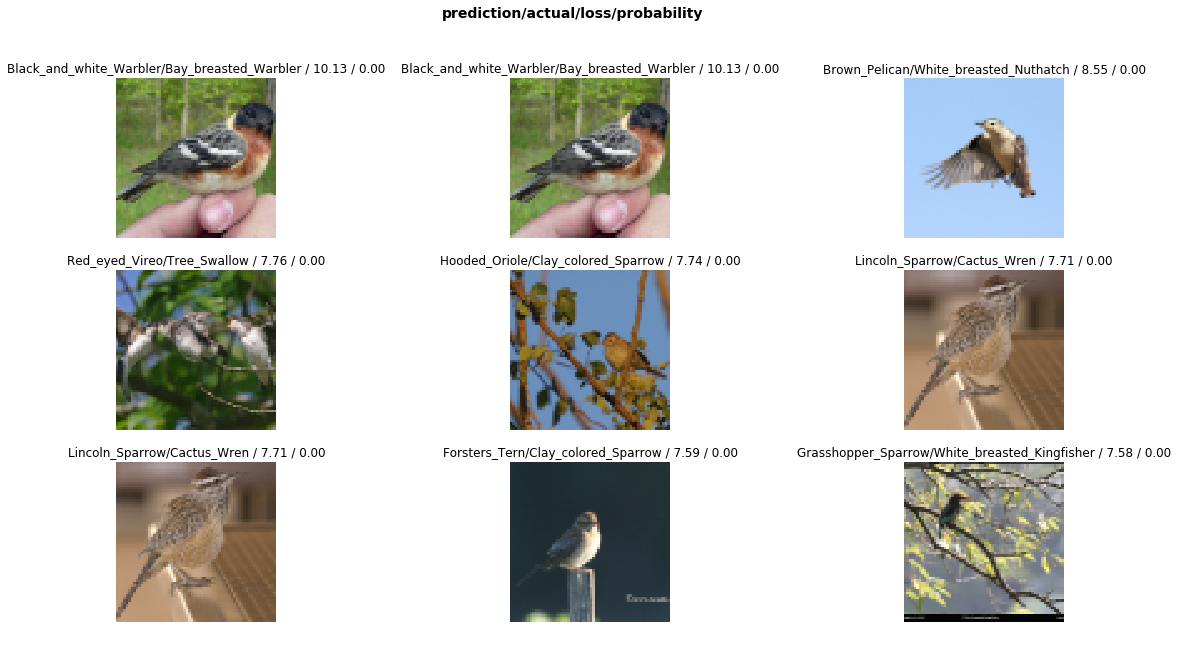

In [0]:
interp.plot_top_losses(9, figsize=(20,10))

In [0]:
interp.most_confused(min_val=4)

[('Artic_Tern', 'Caspian_Tern', 4),
 ('Artic_Tern', 'Elegant_Tern', 4),
 ('Blue_winged_Warbler', 'Prothonotary_Warbler', 4),
 ('Hooded_Merganser', 'Western_Grebe', 4),
 ('Long_tailed_Jaeger', 'Western_Wood_Pewee', 4)]